In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
excel_file = pd.ExcelFile('datos_actividad2.xlsx')

#definir pestañas de trabajo
df = excel_file.parse('Hoja2')
df2 = excel_file.parse('Hoja3')


In [ ]:
#Ver contenido pestañas
df.head(2)

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend,BikeBuyerText
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,M,1,3,0,1,81916,2017-03-06,1,50.97,YES
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,M,1,2,1,2,81076,2017-03-06,1,53.11,YES


In [ ]:
#see the first sheet
df2.head(2)


,CustomerID,BikeBuyer,AvgMonthSpend,CustomerID.1
0,21173,1,50.97,21173
1,13249,1,53.11,13249


In [ ]:
#Ver las variables
list(df)

['CustomerID',
 'Title',
 'FirstName',
 'MiddleName',
 'LastName',
 'Suffix',
 'AddressLine1',
 'AddressLine2',
 'City',
 'StateProvinceName',
 'CountryRegionName',
 'PostalCode',
 'PhoneNumber',
 'BirthDate',
 'Education',
 'Occupation',
 'Gender',
 'MaritalStatus',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'LastUpdated',
 'BikeBuyer',
 'AvgMonthSpend',
 'BikeBuyerText']

#Eliminado inicial de columnas que en analisis preliminar no aportan al modelo

In [ ]:
# Columnas a eliminar por indice
columns_to_drop = list(range(13)) + [14, 15, 26]

In [ ]:
drop_df=df.drop(df.columns[columns_to_drop], axis=1)

In [ ]:
drop_df.head(2)

,BirthDate,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend
0,1987-11-13,M,M,1,3,0,1,81916,2017-03-06,1,50.97
1,1972-07-21,M,M,1,2,1,2,81076,2017-03-06,1,53.11


In [ ]:
#Calcular edad basado en las columnas 'LastUpdated' y 'BirthDate'

# Convertir las columnas de 'BirthDate' y 'LastUpdated' a datetime
drop_df['BirthDate'] = pd.to_datetime(drop_df['BirthDate'])
drop_df['LastUpdated'] = pd.to_datetime(drop_df['LastUpdated'])

In [ ]:
# Calcular edad restando el año de 'BirthDate' del año de 'LastUpdated' y agregar al dataset
drop_df['Age'] = drop_df['LastUpdated'].dt.year - drop_df['BirthDate'].dt.year
drop_df.head(2)

,BirthDate,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated,BikeBuyer,AvgMonthSpend,Age
0,1987-11-13,M,M,1,3,0,1,81916,2017-03-06,1,50.97,30
1,1972-07-21,M,M,1,2,1,2,81076,2017-03-06,1,53.11,45


In [ ]:
# retirar las columnas 'BirthDate' y 'LastUpdated'
columns_to_drop = [0, 8]


In [ ]:
# Retirar las columnas especificadas
drop_df = drop_df.drop(drop_df.columns[columns_to_drop], axis=1)
drop_df.head(2)

,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
0,M,M,1,3,0,1,81916,1,50.97,30
1,M,M,1,2,1,2,81076,1,53.11,45


#Codificación de variables

In [ ]:
# Codificar 'Gender' y 'MaritalStatus'
encoded_df = pd.DataFrame(drop_df)

# Definición del diccionario de mapeo para 'Gender' y 'MaritalStatus'
gender_mapping = {'M': 0, 'F': 1}
marital_mapping = {'S': 0, 'M': 1}

In [ ]:
#reemplazar para mapear los valores
encoded_df['Gender'] = encoded_df['Gender'].replace(gender_mapping)
encoded_df['MaritalStatus'] = encoded_df['MaritalStatus'].replace(marital_mapping)

In [ ]:
encoded_df.head(2)

,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend,Age
0,0,1,1,3,0,1,81916,1,50.97,30
1,0,1,1,2,1,2,81076,1,53.11,45


In [ ]:
list(encoded_df)

['Gender',
 'MaritalStatus',
 'HomeOwnerFlag',
 'NumberCarsOwned',
 'NumberChildrenAtHome',
 'TotalChildren',
 'YearlyIncome',
 'BikeBuyer',
 'AvgMonthSpend',
 'Age']

In [ ]:
# Mover la columna 'BikeBuyer' a la ultima posición para facilidad de modelado

cols = list(encoded_df.columns)
if 'BikeBuyer' in cols:
    cols.remove('BikeBuyer')
cols = cols + ['BikeBuyer']  #Mover a la ultima posición
encoded_df = encoded_df[cols]

In [ ]:
dataset = encoded_df

In [ ]:
dataset.head(2)

,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,BikeBuyer
0,0,1,1,3,0,1,81916,50.97,30,1
1,0,1,1,2,1,2,81076,53.11,45,1


In [ ]:
#Evaluar la correlación entre variables con matriz de correlación.
#Variables a evaluar.

variables = ['Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
             'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AvgMonthSpend', 'Age']

# Calculamos la matriz de correlación para todas las variables excepto 'BikeBuyer' (dependiente)
corr = dataset[variables].corr()

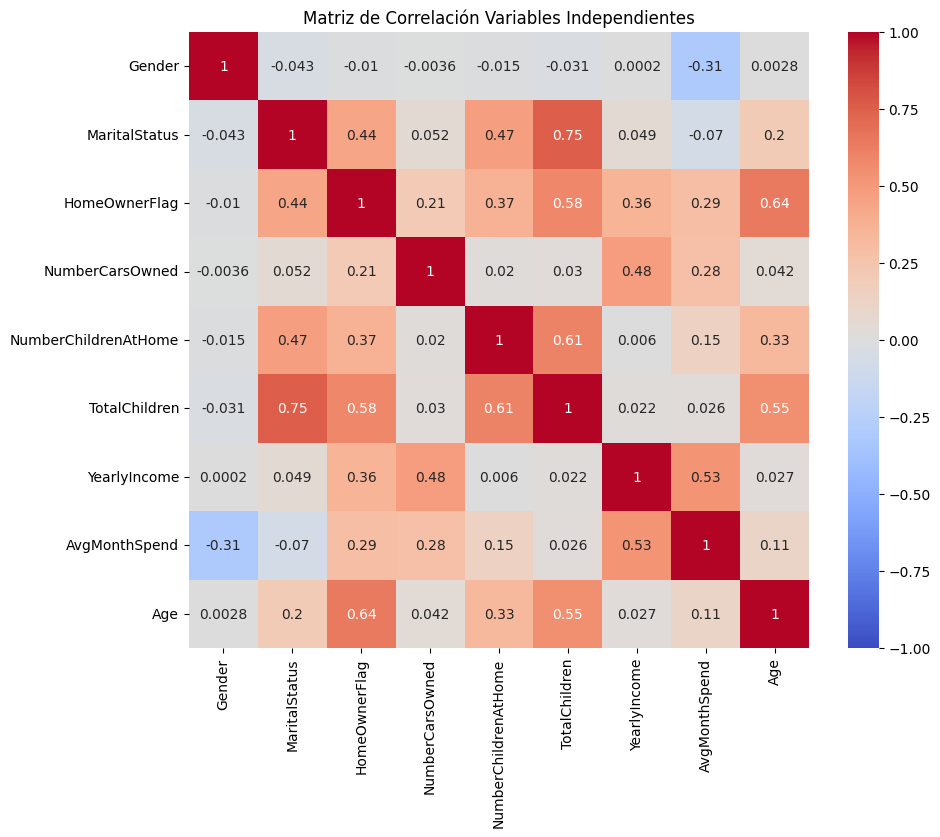

In [ ]:
# Mapa de calor con Seaborn
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación Variables Independientes')
plt.show()

# 'TotalChildren' y MaritalStatus' tienen alta correlación >70%
Se procede a evaluar la importancia de las variables en el modelo para decidir cual variable eliminar de las dos.

In [ ]:
#Selección de la data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#Dividir el dataset en prueba y entrenamiento

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Escalado de las caracteristicas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Entrenar el modelo Kernel SVM model en el set de entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [ ]:
#Evaluar importancia de las variables al modelo
from sklearn.inspection import permutation_importance

result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=0)

In [ ]:
# organizar Indices
sorted_idx = result.importances_mean.argsort()

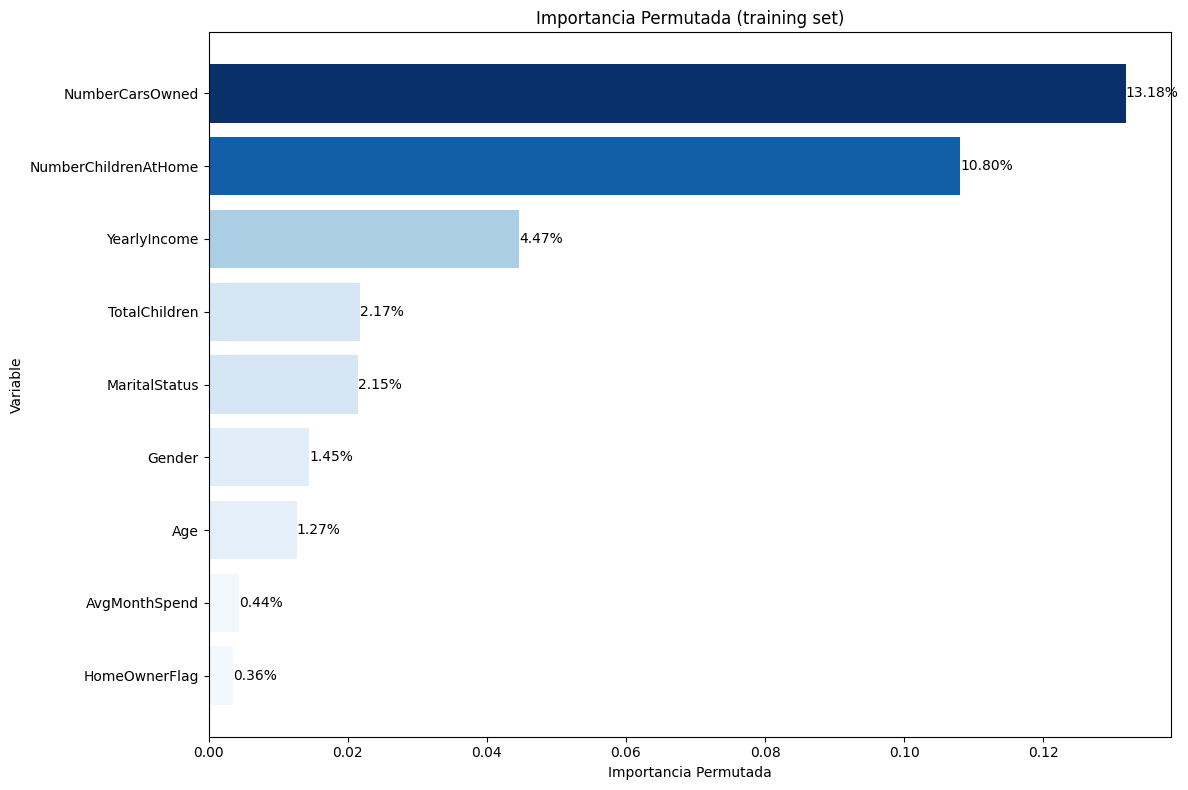

In [ ]:
sorted_idx = np.argsort(result.importances_mean)


feature_names = ['Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
                 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome',
                 'AvgMonthSpend', 'Age']

# Crear mapa de color
cmap = plt.get_cmap('Blues_r')  # Mapa de Colores azules iversos
cmap = cmap.reversed() # Mapa de Colores azules iversos

#Trazar la importancia de la permutación con tamaño de figura ajustado
#y etiquetas personalizadas del eje "y"
plt.figure(figsize=(12, 8))
bars = plt.barh(range(X_train.shape[1]), result.importances_mean[sorted_idx],
                color=cmap(result.importances_mean[sorted_idx] / np.max(result.importances_mean)))
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importancia Permutada")
plt.ylabel("Variable")
plt.title("Importancia Permutada (training set)")

# Agregar etiquetas de porcentaje
for bar, importance in zip(bars, result.importances_mean[sorted_idx]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{importance:.2%}',
             va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()  # AAjustar espacio
plt.show()

In [ ]:
#Lista de variables  y su porcentaje
feature_importance_list = [(feature_names[i], result.importances_mean[i]) for i in sorted_idx]

#print
for feature, importance in feature_importance_list:
    print(f"{feature}: {importance:.2%}")

HomeOwnerFlag: 0.36%
AvgMonthSpend: 0.44%
Age: 1.27%
Gender: 1.45%
MaritalStatus: 2.15%
TotalChildren: 2.17%
YearlyIncome: 4.47%
NumberChildrenAtHome: 10.80%
NumberCarsOwned: 13.18%


In [ ]:
#Matrix de confusión
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculo de la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del Modelo =", accuracy)

[[1431  628]
 [ 386 2144]]
Precisión del Modelo = 0.7790368271954674


Matriz de Confusión:
[[1431  628]
 [ 386 2144]]


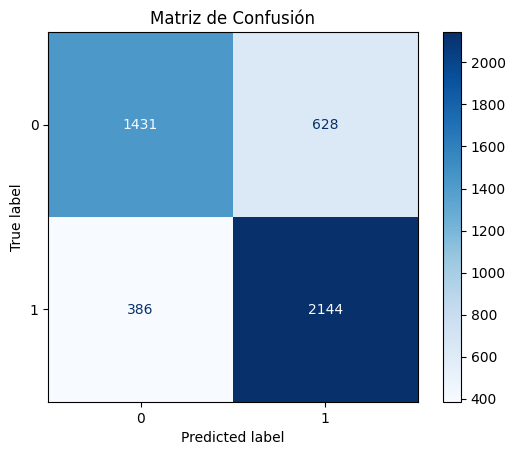

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize=None,  # Not normalized
)
disp.ax_.set_title("Matriz de Confusión")
print("Matriz de Confusión:")
print(disp.confusion_matrix)

plt.show()

##'TotalChildren' Aporta ligeramiente más al modelo, se procedera a sacar del dataset a la variable 'MaritalStatus'

In [ ]:
print(list(dataset))

['Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AvgMonthSpend', 'Age', 'BikeBuyer']


In [ ]:
#columnas seleccionadas para el modelo
columns_to_keep_idx = [0, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#Crear el dataset final sin 'MaritalStatus'

dataset_final = dataset.iloc[:, columns_to_keep_idx]

In [ ]:
#inspección de dataset final
dataset_final.head(2)

,Gender,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AvgMonthSpend,Age,BikeBuyer
0,0,1,3,0,1,81916,50.97,30,1
1,0,1,2,1,2,81076,53.11,45,1


In [ ]:
#Probar el modelo Kernel_SVM con el 'dataset_final'

X1 = dataset.iloc[:, :-1].values
y1 = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X1_train = sc1.fit_transform(X1_train)
X1_test = sc1.transform(X1_test)

In [ ]:
from sklearn.svm import SVC
classifier1 = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier1.fit(X1_train, y1_train)

SVC(probability=True, random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y1_pred = classifier1.predict(X1_test)
cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)


accuracy1 = accuracy_score(y1_test, y1_pred)
print("Precisión del Modelo Final =", accuracy1)

[[1431  628]
 [ 386 2144]]
Precisión del Modelo Final = 0.7790368271954674


Matriz de Confusión:
[[1431  628]
 [ 386 2144]]


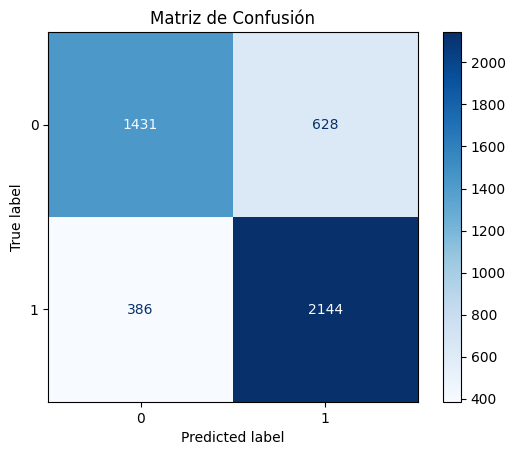

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X1_test,
    y1_test,
    cmap=plt.cm.Blues,
    normalize=None,  # Not normalized
)
disp.ax_.set_title("Matriz de Confusión")
print("Matriz de Confusión:")
print(disp.confusion_matrix)

plt.show()

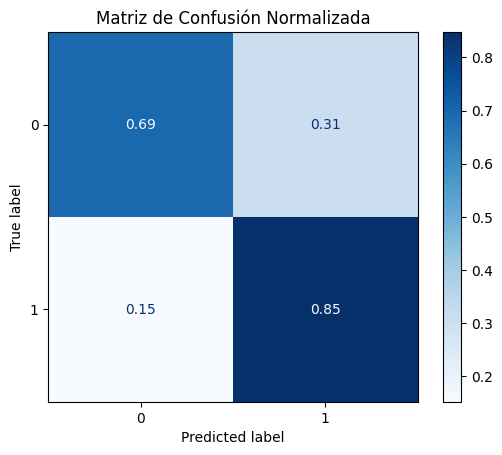

In [ ]:
#Matriz normalizada de confisión
dispN = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X1_test,
    y1_test,
    cmap=plt.cm.Blues,
    normalize='true'  # Normalize along the true (rows)
)
dispN.ax_.set_title("Matriz de Confusión Normalizada")
plt.show()

In [ ]:
# Exportar a un archivo de Excel file (descargar del directorio de colab )
dataset_final.to_excel('AW-Bikes_Dataset.xlsx', index=False)

##Predicción de un posible cliente de compra de bicicleta con el perfil siguiente: Una mujer que tiene casa propia, 2 carros propios, 1 niño en casa, de dos que tuvo su ingreso anual es de USD 80,000 e invierte en AW-Bikes en promedio USD56.2, su edad es de 45 años

In [45]:
print(list(dataset_final))

['Gender', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AvgMonthSpend', 'Age', 'BikeBuyer']


In [48]:
perfil_cliente = np.array([[1, 1, 2, 1, 2, 80000, 56.2, 45, 1]])

In [49]:
#escalado de variables para predecir
perfil_cliente_escalado = sc1.transform(perfil_cliente)

In [52]:
# predicción con el modelo
prediccion = classifier1.predict(perfil_cliente_escalado)

In [50]:
probabilidades = classifier1.predict_proba(perfil_cliente_escalado)[:, 1]

#Predicción

In [53]:
print("Predicción:", prediccion)

print("Probabilidad de ser un comprador de bicicleta:", probabilidades)

Predicción: [1]
Probabilidad de ser un comprador de bicicleta: [0.56291029]


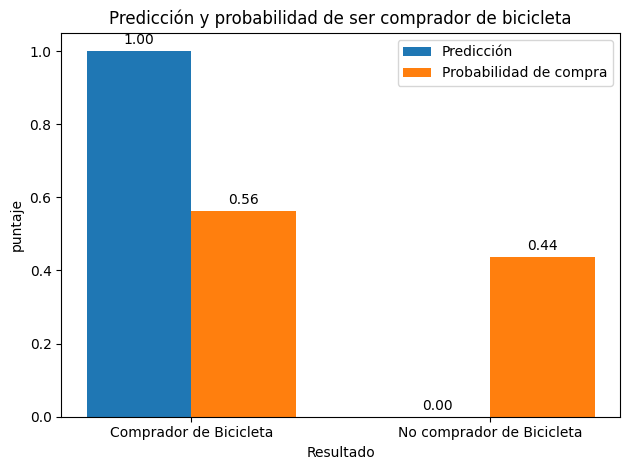

In [54]:
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(2)


bars1 = ax.bar(index, [prediccion[0], 1-prediccion[0]], bar_width, label='Predicción')
bars2 = ax.bar(index + bar_width, [probabilidades[0], 1-probabilidades[0]], bar_width, label='Probabilidad de compra')


ax.set_xlabel('Resultado')
ax.set_ylabel('puntaje')
ax.set_title('Predicción y probabilidad de ser comprador de bicicleta')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Comprador de Bicicleta', 'No comprador de Bicicleta'))
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()